**Data Description**
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Attribute Information:**
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

## 0. Environment Configuration

In [5]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
# load the dataset
cancer_df = pd.read_csv('haberman.csv', header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
print(cancer_df.head())

   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


## 2. Data Preparation

In [7]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


### Observations:
* There are no missing values in this dataset. So there is no need to do data imputation.
* The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
* The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)
    

In [8]:
# print the unique valuesof the target column
print(list(cancer_df['survival_status_after_5_years'].unique()))

[1, 2]


In [9]:
# modify the target column values to be meaningful as well as categorical
cancer_df['survival_status_after_5_years'] = cancer_df['survival_status_after_5_years'].map({1:"yes", 2:"no"})
cancer_df['survival_status_after_5_years'] = cancer_df['survival_status_after_5_years'].astype('category')
print(cancer_df.head())

   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           yes
1   30                 62                     3                           yes
2   30                 65                     0                           yes
3   31                 59                     2                           yes
4   31                 65                     4                           yes


In [10]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


## 3. High Level Statistics

In [11]:
print(cancer_df.describe())

              age  year_of_treatment  positive_lymph_nodes
count  306.000000         306.000000            306.000000
mean    52.457516          62.852941              4.026144
std     10.803452           3.249405              7.189654
min     30.000000          58.000000              0.000000
25%     44.000000          60.000000              0.000000
50%     52.000000          63.000000              1.000000
75%     60.750000          65.750000              4.000000
max     83.000000          69.000000             52.000000


In [29]:
cancer_df.shape

(306, 4)

In [55]:
a=(", ".join(cancer_df.columns))
list(cancer_df.columns)



['age',
 'year_of_treatment',
 'positive_lymph_nodes',
 'survival_status_after_5_years']

In [12]:
print("Number of rows: " + str(cancer_df.shape[0]))
print("Number of columns: " + str(cancer_df.shape[1]))
print("Columns: " + ", ".join(cancer_df.columns))

print("Target variable distribution")
print(cancer_df.iloc[:,-1].value_counts())
print("*"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))

Number of rows: 306
Number of columns: 4
Columns: age, year_of_treatment, positive_lymph_nodes, survival_status_after_5_years
Target variable distribution
yes    225
no      81
Name: survival_status_after_5_years, dtype: int64
**************************************************
yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64


### Observations:
* The age of the patients vary from 30 to 83 with the median of 52.
* Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes 
* The dataset contains only a small number of records (306). 
* The target column is imbalanced with 73% of values are 'yes'

## 4. Objective
* To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

## 5. Univariate Analysis

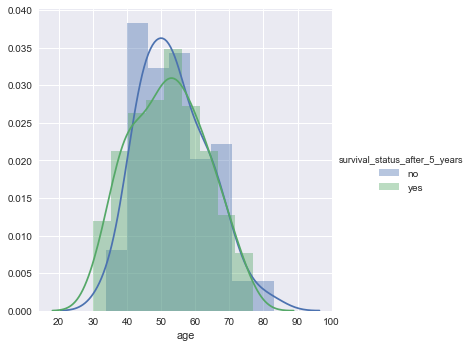

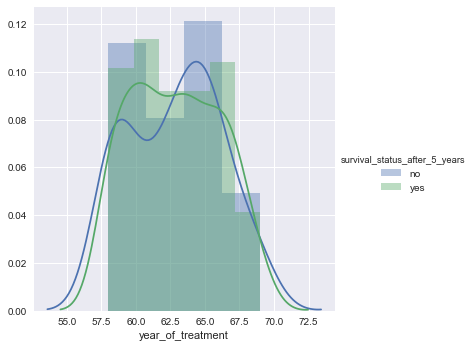

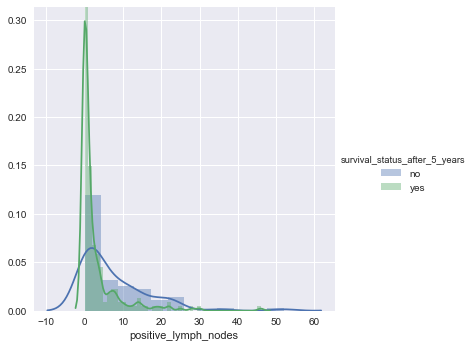

In [32]:
#5.1 Distribution plots
"""
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group
"""
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    fg = sns.FacetGrid(cancer_df, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]


CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


********* year_of_treatment *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


********* positive_lymph_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.9

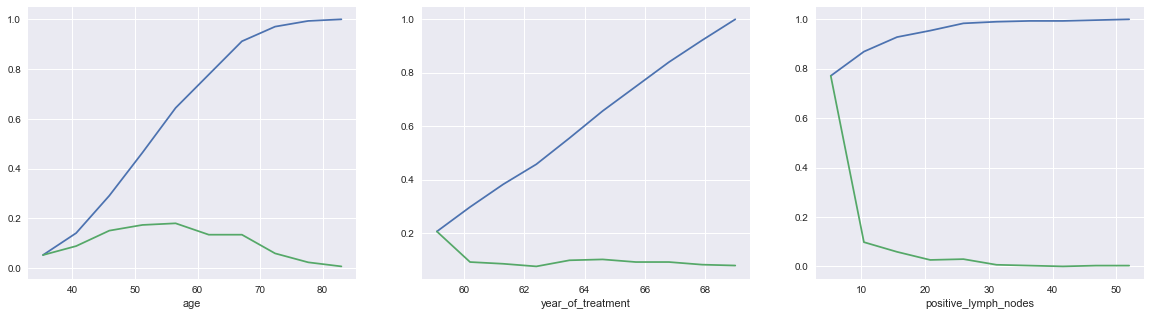

In [63]:
#5.2 CDF
"""
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(cancer_df[feature], bins=10, density=True)
    print("Bin Edges: {}\n\n".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}\n\n".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}\n\n".format(cdf))
    plt.plot(bin_edges[1:], cdf)
    plt.plot(bin_edges[1:], pdf)
    plt.xlabel(feature)

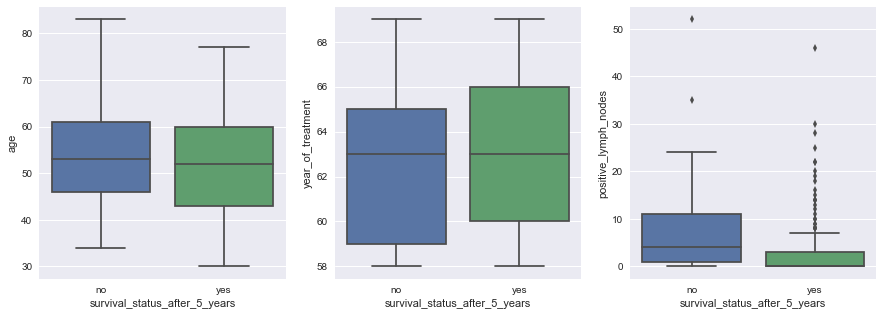

In [64]:
#5.3 Box Plots
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=cancer_df, ax=axes[idx])
plt.show()  

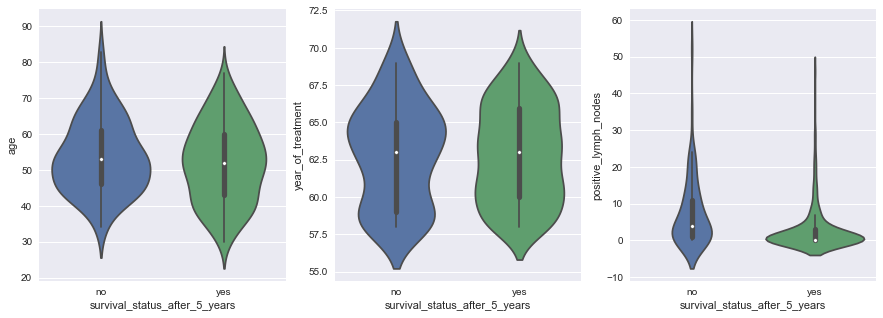

In [34]:
#5.4 Violin Plots
"""
Violin plot is the combination of box plot and probability density function.
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.violinplot( x='survival_status_after_5_years', y=feature, data=cancer_df, ax=axes[idx])
plt.show()

## Observations
* The number of positive lymph nodes of the survivors is highly densed from 0 to 5. (#5.1)
* Almost 80% of the patients have less than or equal to 5 positive lymph nodea. (#5.2)
* The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. (#5.3 and #5.4)

## 6. Multivariate Analysis

In [15]:
# pair plot
"""
Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables
"""
sns.pairplot(cancer_df, hue='survival_status_after_5_years', size=4)
plt.show()

## Observations
* By scattering the data points between *year_of_treatment* and *positive_lymph_nodes*,  we can see the better seperation between the two clases than other scatter plots.